# **Visualización**
# AE08. Seaborn Violin y Lineplot

Veamos dos nuevos tipos de gráficos en Seaborn; uno de ellos, llamado gráfico de violín, es muy característico de esta librería.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [1]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [3]:
sns.set(context='notebook', style='darkgrid', palette='dark')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

In [5]:
penguins_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


El segundo set de datos, corresponde a las temperaturas máximas diarias, en distintas localidades de Australia:

In [6]:
path = "/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD05.csv"
temps_df = pd.read_csv(path)
temps_df.Date = pd.to_datetime(temps_df.Date)
temps_df.sample(5)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
462,462,IDCJAC0010,40913,2019,4,8,29.1,1.0,Y,brisbane,2019-04-08
2509,2509,IDCJAC0010,9225,2019,11,16,40.4,1.0,N,perth,2019-11-16
2389,2389,IDCJAC0010,9225,2019,7,19,19.4,1.0,N,perth,2019-07-19
1619,1619,IDCJAC0010,94029,2019,6,9,13.2,1.0,Y,hobart,2019-06-09
2399,2399,IDCJAC0010,9225,2019,7,29,17.3,1.0,N,perth,2019-07-29


##<font color='blue'>Diagramas de violín (violinplots)</font>

Los diagramas de violín corresponden a un tipo de grafico similar al gráfico de caja y bigotes. En este caso se muestra una barra interna con un punto blanco, donde este punto corresponde a la mediana, y el largo de la barra corresponden a $Q1$ y $Q3$. Se muestra además con unas líneas la misma cobertura de los bigotes, pero la gran diferencia es que el diagrama de violín muestra una estimación de la distribución a través de los distintos valores a graficar. El método corresponde a `sns.violinplot(x=X, y=Y, data=df)`.

[Documentación Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)


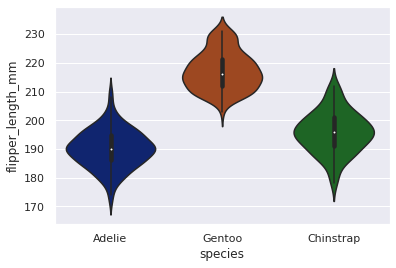

In [ ]:
sns.violinplot(x='species',y='flipper_length_mm',
               data=penguins_df)
plt.show()

Al igual que los boxplots, nosotros podemos separar cada *violinplot* según el parámetro `hue`. Adicionalmente, nosotros podemos utilizar el parámetro `split=True` en conjunto con `hue` para poder presentar de forma divida en un mismo violin, las distintas distribuciones por la que estamos separando según la columna `hue`:

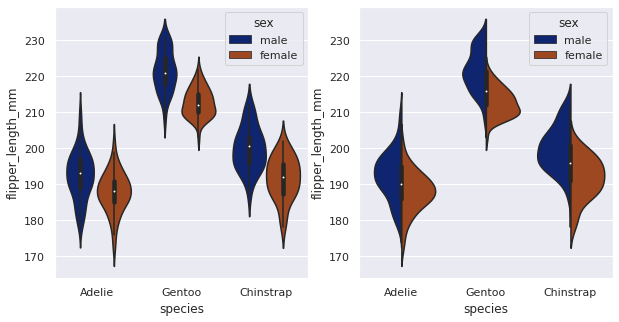

In [7]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
#se plotea por separada cada clase
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', ax = ax[0])
#separar las variables por mitades
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', split=True, ax = ax[1])
plt.show()

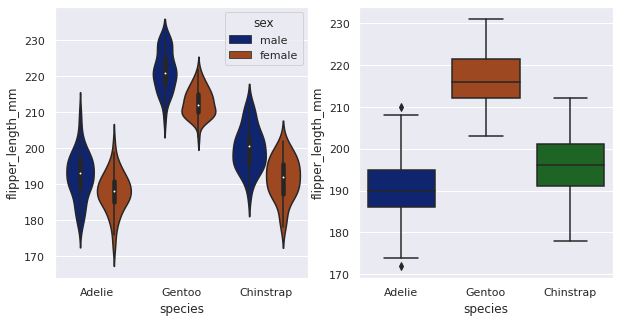

In [8]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
#se plotea violin plot a la izquierda
sns.violinplot(x='species', y='flipper_length_mm', data=penguins_df, hue='sex', ax = ax[0])
#se plotea box plot a la derecha
sns.boxplot(x='species', y='flipper_length_mm', data=penguins_df, ax = ax[1])
plt.show()

##<font color='blue'>Diagramas de Líneas (lineplot)</font>

Para este tipo de gráfico vamos a utilizar el set de datos de la temperatura y el método `sns.lineplot`. Tal como el método de `sns.barplot`, `Seaborn` si es que tiene la oportunidad, va a hacer agregación de los datos dependiendo de cómo nosotros presentemos los datos, el uso de los parametros `hue` y posibles valores dependientes de categorías (en este caso, como tenemos 8 ciudades de Australia, vamos a tener 8 mediciones de temperatura para cada día). 

[Documentación Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot)


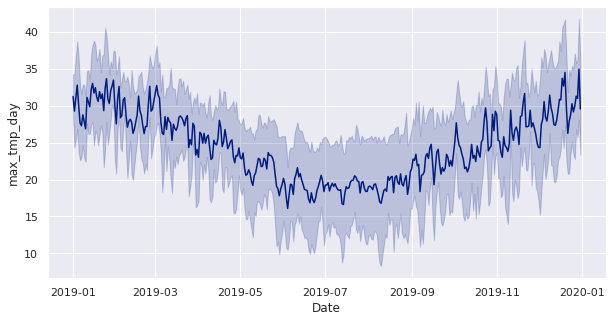

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, ci='sd') # Definimos el Intervalo de confianza como la desviación estandar
plt.show()

In [ ]:
temps_df.City.nunique()

8

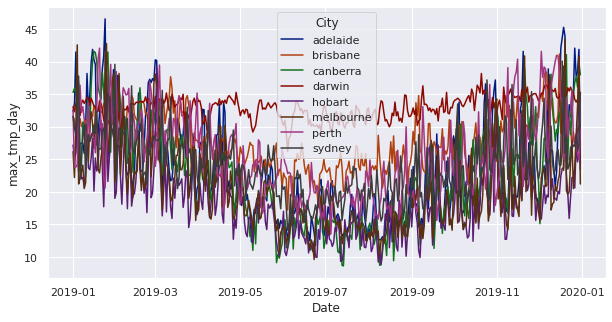

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df, ci='sd', hue='City') 
plt.show()

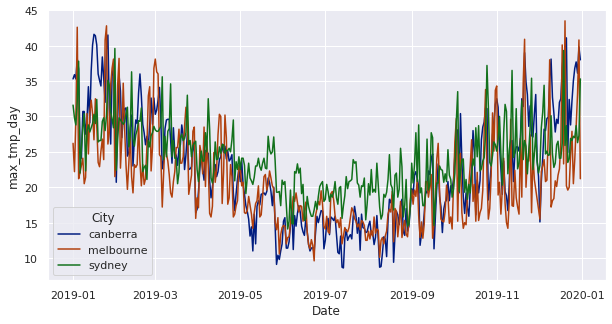

In [ ]:
ciudad1 = 'sydney'
ciudad2 = 'melbourne'
ciudad3 = 'canberra'

mask1 = temps_df.City == ciudad1
mask2 = temps_df.City == ciudad2
mask3 = temps_df.City == ciudad3

plt.figure(figsize=(10,5))
# sns.lineplot(x='Date', y='max_tmp_day', data=temps_df[mask1 | mask2 | mask3], ci='sd', hue='City')
sns.lineplot(x='Date', y='max_tmp_day', data=temps_df[mask1 | mask2 | mask3], hue='City')
plt.show()

## <font color='green'>Actividad 1:</font>

Para esta dinámica revisitaremos el set de datos de precios de casa de King County Housing (VD08.csv). Realizaremos visualizaciones sencillas utilizando el conocimiento recientemente adquirido:

- Graficar la matriz de correlación para las distintas variables numéricas **nota:** el parámetro `fmt='.2f'` transformara el texto de anotaciones a 2 decimales máximo
- Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos
- Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). **¿Qué puede observar de esto?**
- utilizando subplots, genere 2 lineplots
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero separadas por la columna **waterfront**


In [9]:
housing_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD08.csv")
housing_df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


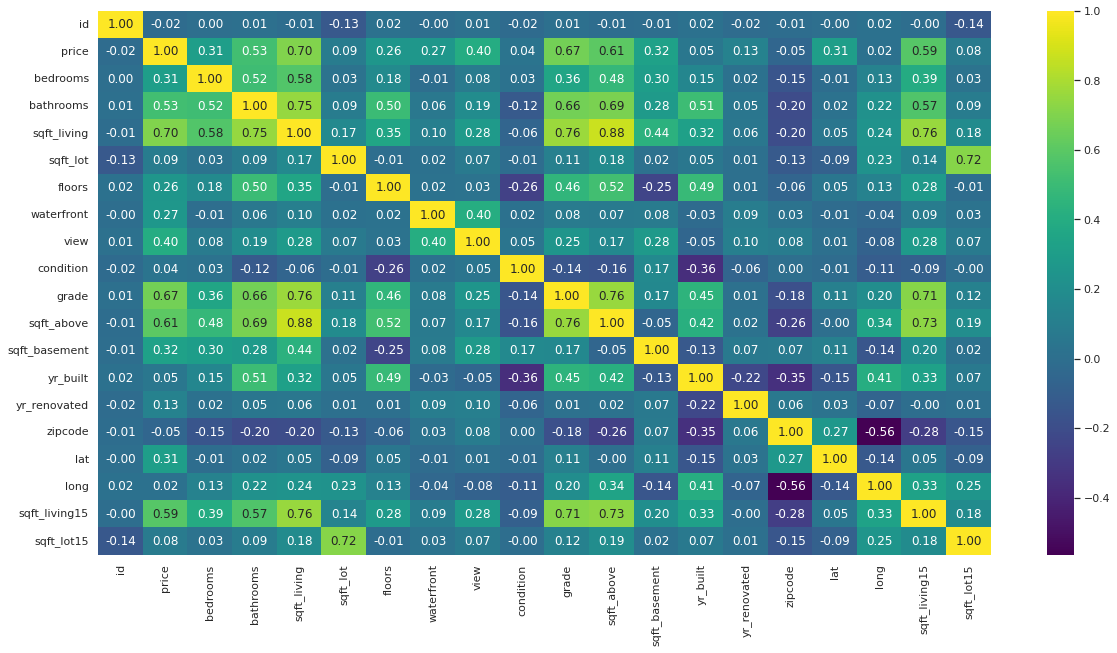

In [10]:
# Graficar la matriz de correlación para las distintas variables numéricas 
# nota: el parámetro fmt='.2f' transformara el texto de anotaciones a 2 decimales máximo
fig, ax = plt.subplots(figsize=(20,10), )

corr = housing_df.corr()

sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()


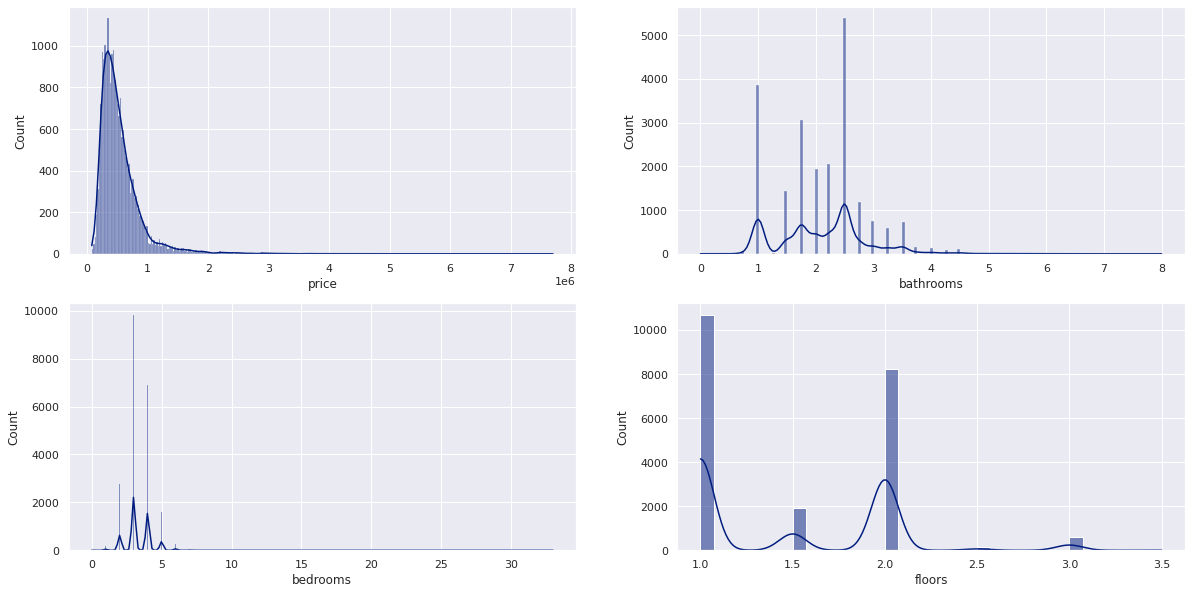

In [11]:
# Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos

fig, ax = plt.subplots(2,2,figsize=(20,10))

sns.histplot(x='price', data = housing_df, kde=True, ax = ax[0,0])
sns.histplot(x='bedrooms', data = housing_df, kde=True, ax = ax[1,0])
sns.histplot(x='bathrooms', data = housing_df, kde=True, ax = ax[0,1])
sns.histplot(x='floors', data = housing_df, kde=True, ax = ax[1,1])

plt.show()

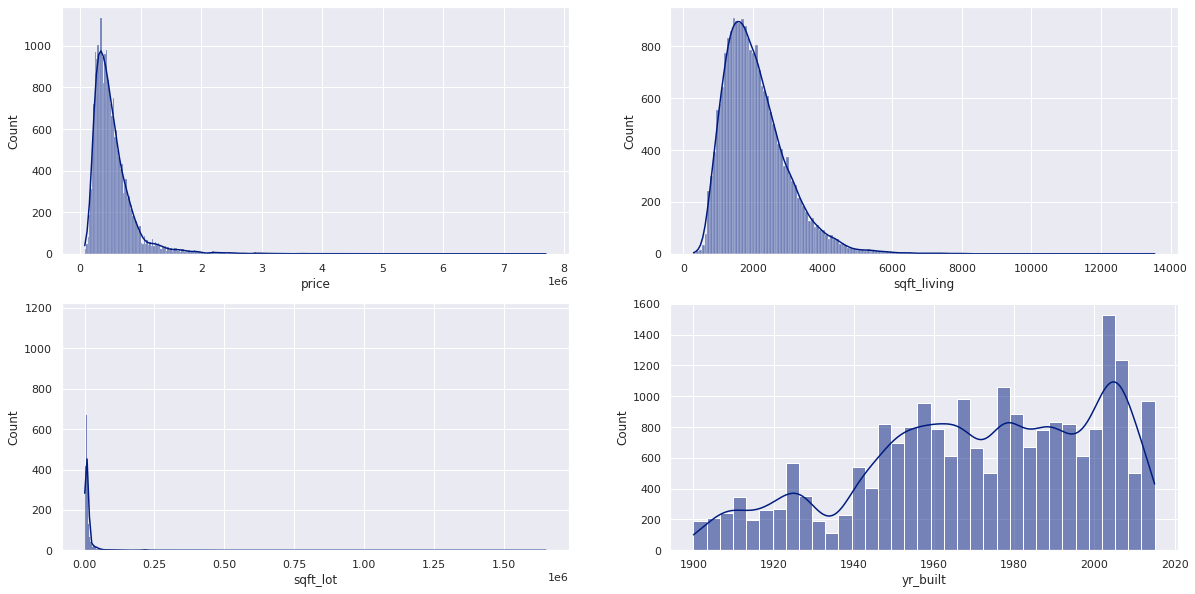

In [12]:
# Utilizando subplots genere 4 histogramas de distintas variables 
# presentes en el set de datos

fig, ax = plt.subplots(2,2, figsize=(20,10))

sns.histplot(x='price', data = housing_df, kde=True, ax = ax[0,0])
sns.histplot(x='sqft_living', data = housing_df, kde=True, ax = ax[0,1])
sns.histplot(x='sqft_lot', data = housing_df, kde=True, ax = ax[1,0])
sns.histplot(x='yr_built', data = housing_df, kde=True, ax = ax[1,1])

plt.show()

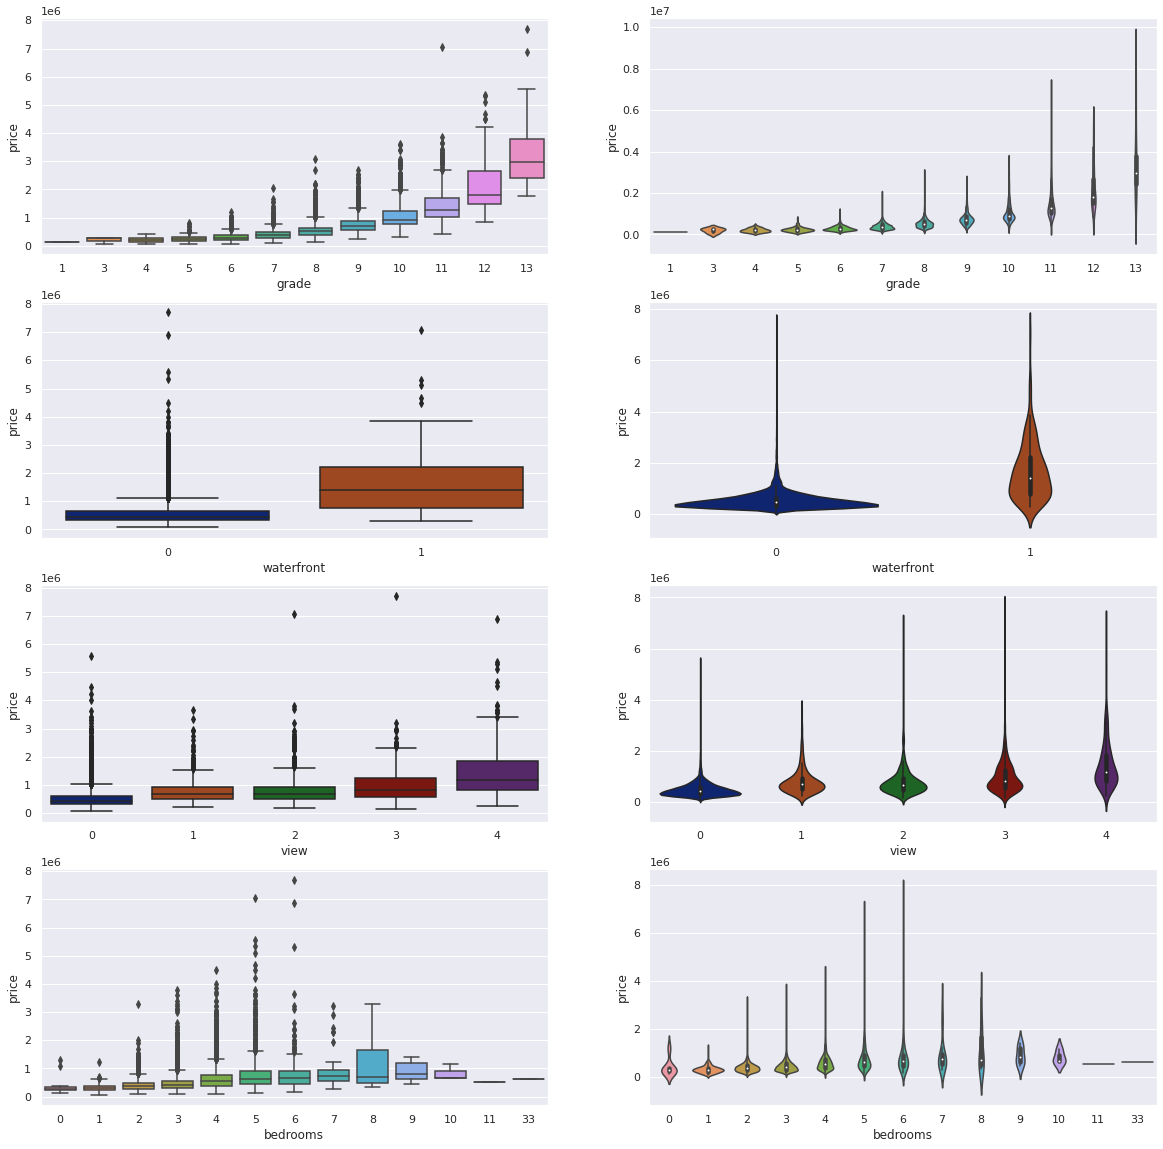

In [ ]:
# Utilizando subplots genere 2 boxplots y dos violinplots, 
# comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). 
# ¿Qué puede observar de esto?

fig, ax = plt.subplots(4,2,figsize=(20,20))

sns.boxplot(x='grade',y='price',data=housing_df, ax = ax[0,0]) #,hue='floors'
sns.boxplot(x='waterfront',y='price',data=housing_df, ax = ax[1,0]) #,hue='floors'

sns.violinplot(x='grade',y='price',data=housing_df, ax = ax[0,1]) #,hue='floors'
sns.violinplot(x='waterfront',y='price',data=housing_df, ax = ax[1,1]) #,hue='floors'
#
sns.boxplot(x='view',y='price',data=housing_df, ax = ax[2,0]) #,hue='floors'
sns.boxplot(x='bedrooms',y='price',data=housing_df, ax = ax[3,0]) #,hue='floors'

sns.violinplot(x='view',y='price',data=housing_df, ax = ax[2,1]) #,hue='floors'
sns.violinplot(x='bedrooms',y='price',data=housing_df, ax = ax[3,1]) #,hue='floors'

plt.show()

In [ ]:
housing_df.price

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

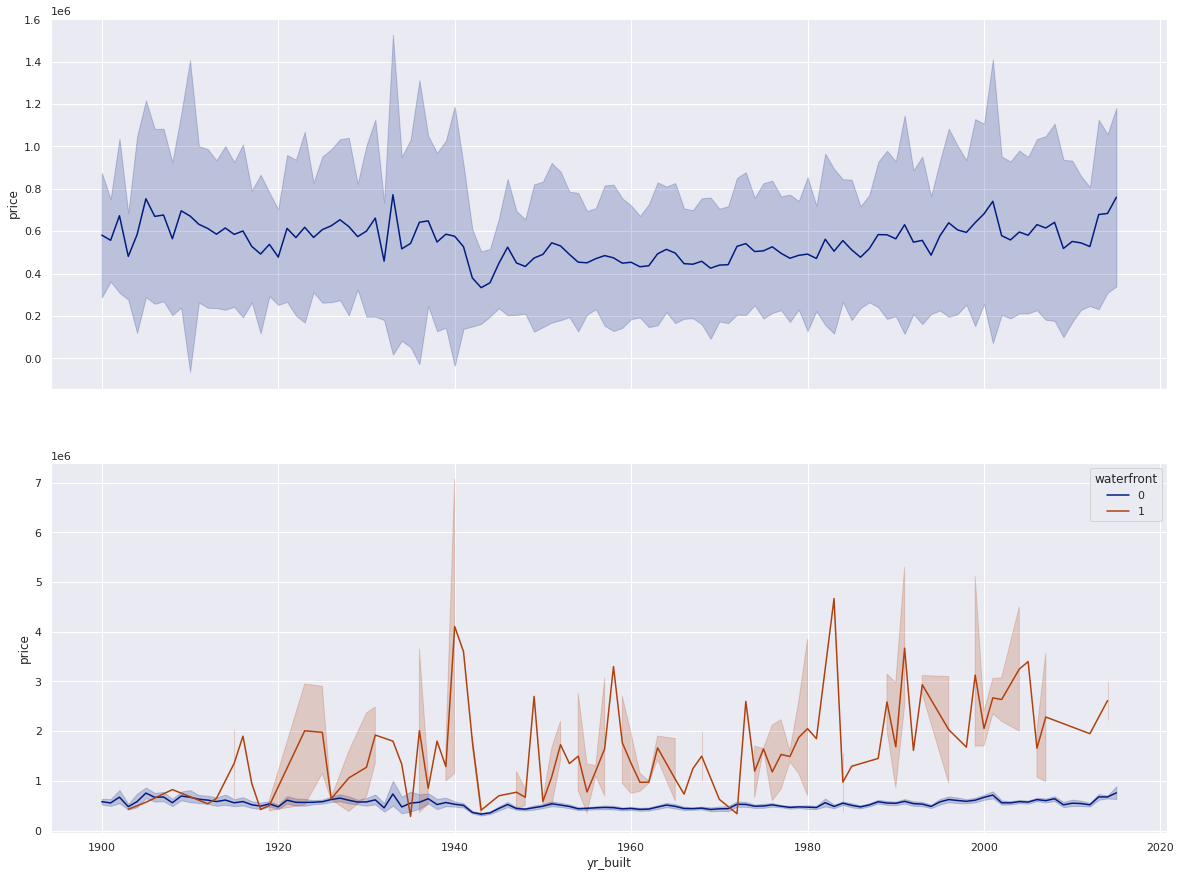

In [13]:
# utilizando subplots, genere 2 lineplots
# Precio de las casas a través de los años que fueron construidas
# Precio de las casas a través de los años que fueron construidas pero separadas por la columna waterfront

fig, ax = plt.subplots(2,1,figsize=(20,15), sharex=True)

sns.lineplot(x='yr_built', y='price', data=housing_df, ci='sd', ax = ax[0]) 

sns.lineplot(x='yr_built', y='price', data=housing_df, hue='waterfront', ax = ax[1]) #

# plt.yscale('log')
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

plt.show()


_Conclusión_: La evolución de los precios con casas frente al mar han tenido un alza mucho más significativa que las casas (o bienes inmuebles) sin vista al mar. En términos prácticos, la plusvalia de los bienes inmuebles con vista al mar ha crecido mucho más a lo largo de los años que la plusvalia de las viviendas sin vista al mar.  

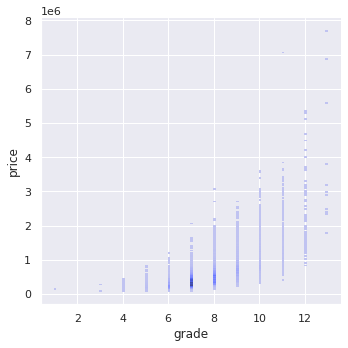

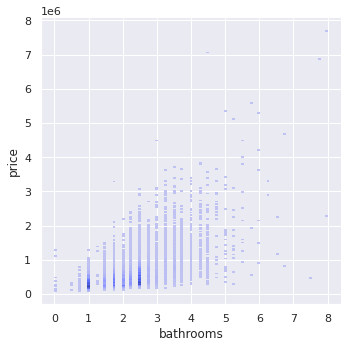

In [ ]:
#plotear las mismas variables con graficos de dispersión

sns.displot(x='grade',y='price',data=housing_df) #,hue='floors'
plt.show()

sns.displot(x='bathrooms',y='price',data=housing_df) #
plt.show()


<font color='green'>Fin actividad 1</font>